# Diwali Sales : Exploratory Data Analysis

![Diwali](https://cdn2.wanderlust.co.uk/media/1009/diwali-lamps.jpg?anchor=center&mode=crop&width=1600&height=0&format=auto&quality=90&rnd=132163880120000000)

## Introduction

### About Dataset

**Description**: This dataset contains sales data for a retail store during the Diwali festival period in India. The data includes information on the products sold, their categories, the sale prices, and the quantities sold.

**Format**: CSV

**Fields**:

| **Field**        | **Description**                                                  |
|------------------|------------------------------------------------------------------|
| User_ID          | Unique identifier for each user                                  |
| Cust_name        | Name of the customer                                             |
| Product_ID       | Unique identifier for each product sold                          |
| Gender           | Gender of the customer (e.g., Male, Female)                      |
| Age Group        | Categorical age group of the customer                            |
| Age              | Age of the customer                                              |
| Marital_Status   | Marital status of the customer (e.g., Married, Single)           |
| State            | Customer's state of residence in India                           |
| Zone             | Customer's geographical zone/region in India                     |
| Occupation       | Occupation of the customer                                       |
| Product Category | Category of the product (e.g. electronics, clothing, home decor) |
| Orders           | Number of units of product ordered by the customer               |
| Amount           | Final amount spent by the customer                               |
| Status           | (Empty Column)                                                   |
| unnamed1         | (Empty Column)                                                   |

### Aim
The **aim** is to :-
- perform preliminary data analysis to get a basic understanding of the data.
- prepare and clean the data for further analysis.
- perform exploratory data analysis and reveal insights.
- generate beautiful and meaningful plots and visualizations.
- list the major insights and findings.

## Loading the data

Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import missingno as mno
import plotly.express as px

Loading the data as a pandas dataframe

In [2]:
filename='/kaggle/input/diwali-sales/Diwali Sales Data.csv'
df=pd.read_csv(filename, encoding='unicode_escape')

## Preliminary data analysis

In [3]:
# dataframe styling
headers={"selector" : "th:not(.index_name)", 
           "props" : "font-weight:bold; font-size:110%"}

caption={"selector" : "caption", 
           "props" : "text-align:center; font-size:120%; font-weight:bold;"}

Looking at the first 5 records

In [4]:
df.head(5).style.set_caption("First 5 records").set_properties(**{"border" : "1px solid"}).set_table_styles([headers, caption])

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.000000,nan,nan
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.000000,nan,nan
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.000000,nan,nan
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.000000,nan,nan
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.000000,nan,nan


Looking at the last 5 records

In [5]:
df.tail(5).style.set_caption("Last 5 records").set_properties(**{"border" : "1px solid"}).set_table_styles([headers, caption])

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.000000,nan,nan
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.000000,nan,nan
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.000000,nan,nan
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.000000,nan,nan
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.000000,nan,nan


Looking at 5 random records

In [6]:
df.sample(5).style.set_caption("5 random records").set_properties(**{"border" : "1px solid"}).set_table_styles([headers, caption])

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
7749,1004879,Saurabh,P00205842,F,26-35,28,0,Uttar Pradesh,Central,Banking,Electronics & Gadgets,3,6180.000000,nan,nan
7837,1002125,Noshiba,P00026042,F,36-45,40,0,Himachal Pradesh,Northern,Food Processing,Electronics & Gadgets,1,6126.000000,nan,nan
7415,1002116,Stuti,P00001442,F,18-25,22,0,Uttar Pradesh,Central,Govt,Clothing & Apparel,3,6951.000000,nan,nan
260,1004436,Talbott,P0096542,F,26-35,28,0,Kerala,Southern,Retail,Tupperware,2,20477.000000,nan,nan
1804,1004972,Barcio,P00022942,F,36-45,44,1,Maharashtra,Western,Banking,Food,3,15750.000000,nan,nan


Looking at some general information regarding the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


Checking for missing values

In [8]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

Checking for duplicate records

In [9]:
df.duplicated().sum()

8

- The dataframe has 11251 rows and 15 columns.
- Column names are not in proper format.
- 'Status' and 'unnamed1' are useless as they are empty columns.
- There are 12 records with missing values for 'amount'.
- There are 8 instances of duplicated records. These duplicates may arise from repeated record entries, or identical sales that occurred more than once.

## Data preparation and cleaning

Removing 'Status' and 'unnamed1'

In [10]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

Renaming columns to the appropriate format

In [11]:
df.rename(lambda col : col.lower().strip().replace(' ', '_'), axis='columns', inplace=True)

Converting the data type of 'user_id' to 'string'

In [12]:
df['user_id']=df['user_id'].astype('str')

Converting the data type of 'marital_status' to 'string'

In [13]:
df['marital_status']=df['marital_status'].astype('str')

Converting the data type of 'orders' to 'string'

In [14]:
df['orders']=df['orders'].astype('str')

In [15]:
print("Updated columns :-\n")
df.dtypes

Updated columns :-



user_id              object
cust_name            object
product_id           object
gender               object
age_group            object
age                   int64
marital_status       object
state                object
zone                 object
occupation           object
product_category     object
orders               object
amount              float64
dtype: object

Visualizing the missing/null values

<Axes: >

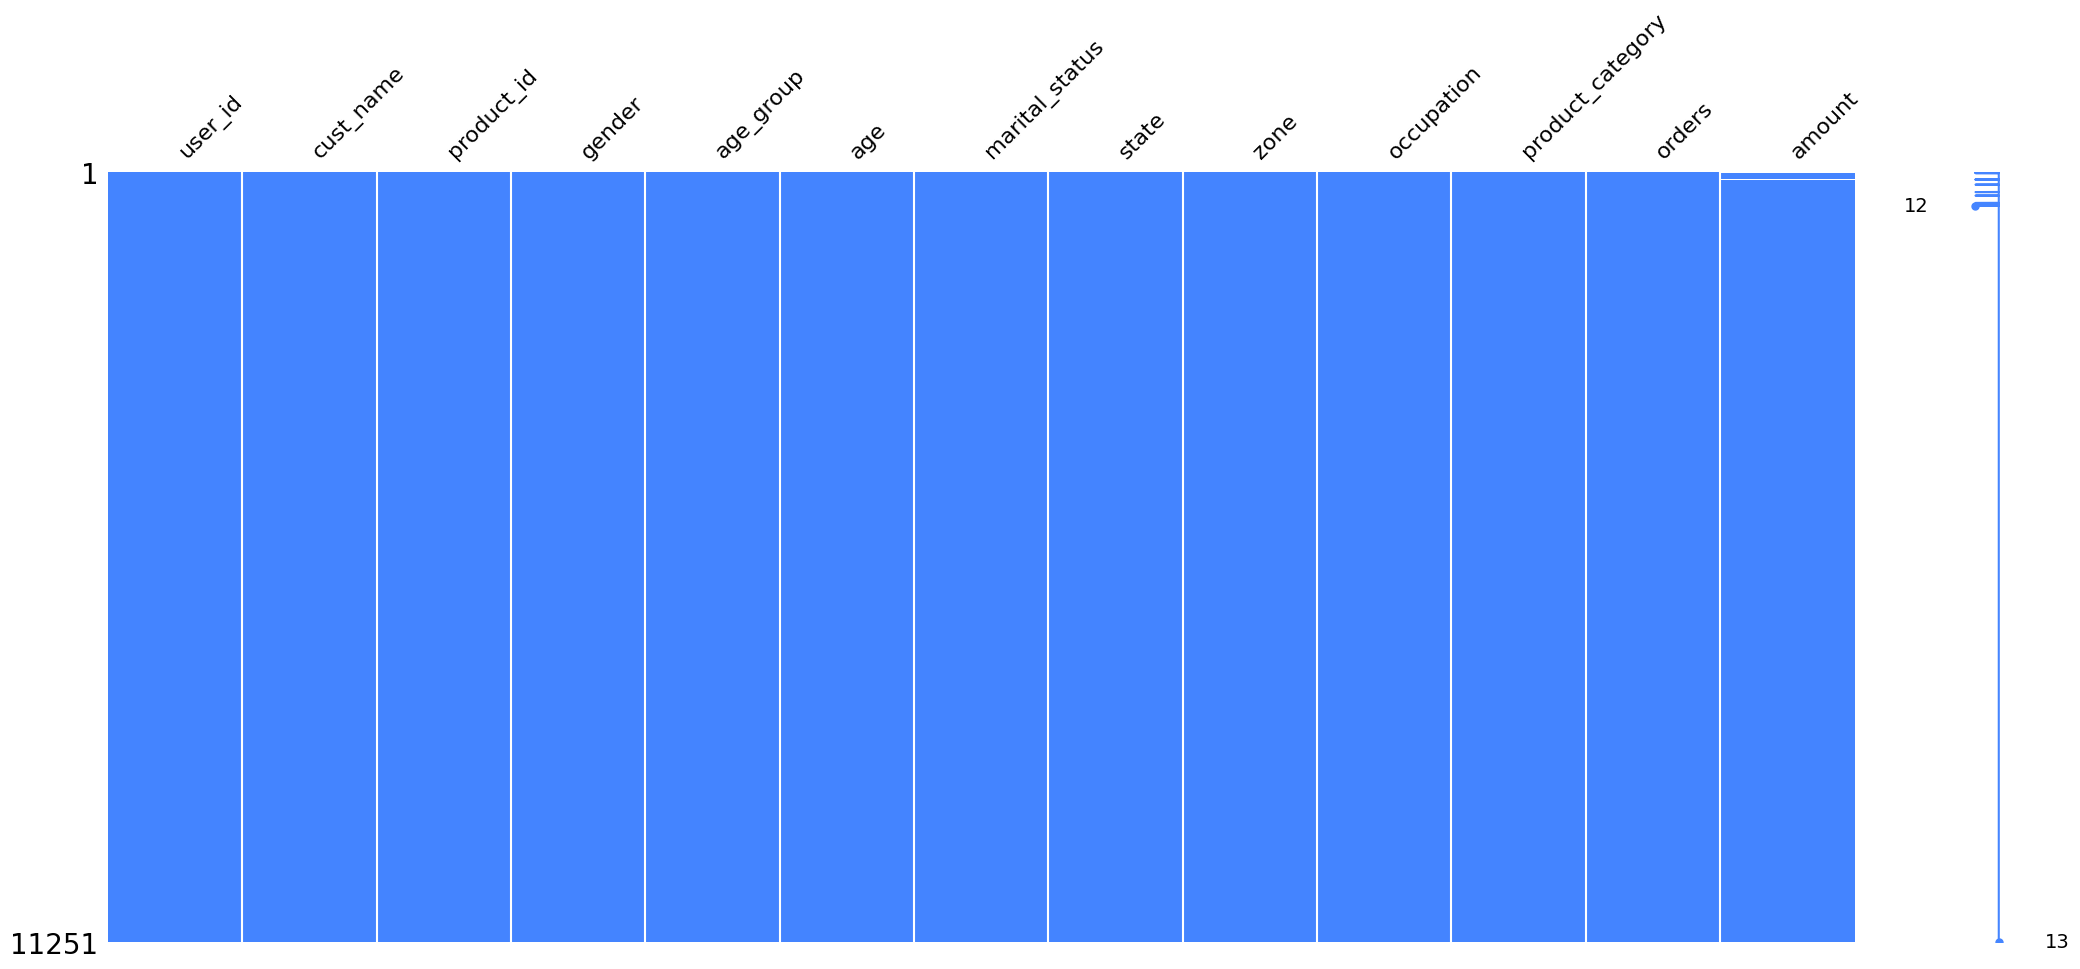

In [16]:
mno.matrix(df, color=(0.27, 0.52, 1.0))

Looking at the records with missing values

In [17]:
df_na=df[df.isna().any(axis=1)]
df_na.style.set_caption("Records with missing values").set_properties(**{"border" : "1px solid"}).highlight_null('red').set_table_styles([headers, caption])

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,nan
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,nan
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,nan
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,nan
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,nan
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,nan
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,nan
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,nan
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,nan
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,nan


Removing records with missing values

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

user_id             0
cust_name           0
product_id          0
gender              0
age_group           0
age                 0
marital_status      0
state               0
zone                0
occupation          0
product_category    0
orders              0
amount              0
dtype: int64

- 'Status' and 'unnamed1' have been removed as they were empy columns.
- Columns have been renamed in the appropriate format (converted to lowercase, spaces replaced with '_').
- The data types of 'user_id', 'marital_status', and 'orders' have been converted to 'string' for convenience.
- Since there were very few records with missing values, they were removed.

## Exploratory data analysis and visualization

### Univariate analysis

#### product_id

Looking at the number of different products

In [20]:
df['product_id'].nunique()

2350

Plotting the top 10 most ordered products

In [21]:
top_10_products=df.groupby(['product_id']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)

fig=px.bar(data_frame=top_10_products, 
             x='product_id', 
             y='counts', 
             color='product_id', 
             text_auto=True)

fig.update_layout(title="Top 10 most ordered products", 
                  height=500, 
                  width=800, 
                  showlegend=False, 
                  yaxis_title_text='Number of orders', 
                  xaxis_title_text='Product IDs', 
                  xaxis_tickangle=35)

fig.show()

#### gender

Looking at the number of orders for each gender

In [22]:
df['gender'].value_counts()

gender
F    7832
M    3407
Name: count, dtype: int64

Visualizing the distribution of orders with respect to gender

In [23]:
gender=df.groupby(['gender']).size().reset_index(name='counts')
gender

,gender,counts
0,F,7832
1,M,3407


In [24]:
gender=df.groupby(['gender']).size().reset_index(name='counts')
gender['gender']=gender['gender'].replace('F', 'Female')
gender['gender']=gender['gender'].replace('M', 'Male')

fig=px.pie(gender, 
           values='counts', 
           names='gender')

gender_labels = {'F': 'Females', 'M': 'Males'}

fig.update_layout(title="Distribution of orders w.r.t gender", 
                  height=500, 
                  width=800)

fig.show()

#### age_group

Looking at the different age groups

In [25]:
df['age_group'].unique()

array(['26-35', '0-17', '18-25', '51-55', '46-50', '55+', '36-45'],
      dtype=object)

Looking at the number of orders from each age group

In [26]:
df['age_group'].value_counts()

age_group
26-35    4541
36-45    2283
18-25    1879
46-50     983
51-55     830
55+       427
0-17      296
Name: count, dtype: int64

Plotting the distribution of orders across the various age groups

In [27]:
age_group=df.groupby(['age_group']).size().reset_index(name='counts')

fig=px.bar(data_frame=age_group, 
             x='age_group', 
             y='counts', 
             color='age_group', 
             text_auto=True)

fig.update_layout(title="Distribution of orders across various age groups", 
                  height=500, 
                  width=800,  
                  showlegend=False, 
                  yaxis_title_text='Number of orders', 
                  xaxis_title_text='Age groups')

fig.update_xaxes(categoryorder='array', categoryarray=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])

fig.show()

#### age

Looking at the statistical description of 'age'

In [28]:
df['age'].describe()

count    11239.000000
mean        35.410357
std         12.753866
min         12.000000
25%         27.000000
50%         33.000000
75%         43.000000
max         92.000000
Name: age, dtype: float64

Visualizing the distribution of ages

In [29]:
fig=px.box(df, x="age", points='all')

fig.update_layout(title="Distribution of ages", 
                  height=400, 
                  width=800,  
                  showlegend=False, 
                  xaxis_title_text='Ages')

fig.show()

#### marital_status

Looking at the number of orders based on marital status

In [30]:
df['marital_status'].value_counts()

marital_status
0    6518
1    4721
Name: count, dtype: int64

Visualizing the distribution of orders with respect to marital status

In [31]:
marital_status=df.groupby(['marital_status']).size().reset_index(name='counts')
marital_status['marital_status']=marital_status['marital_status'].replace('0', 'Not married')
marital_status['marital_status']=marital_status['marital_status'].replace('1', 'Married')

fig=px.pie(marital_status, 
             values='counts', 
             names='marital_status')

fig.update_layout(title="Distribution of orders w.r.t marital status", 
                  height=500, 
                  width=800)

fig.show()

#### state

Looking at the various states from which orders have been received

In [32]:
df['state'].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Haryana', 'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

Looking at the number of orders from each state

In [33]:
df['state'].value_counts()

state
Uttar Pradesh       1944
Maharashtra         1525
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              427
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: count, dtype: int64

Plotting the distribution of orders across various states

In [34]:
state=df.groupby(['state']).size().reset_index(name='counts').sort_values('counts', ascending=False)

fig=px.bar(data_frame=state, 
             x='state', 
             y='counts', 
             color='state', 
             text_auto=True)

fig.update_layout(title="Distribution of orders across various states", 
                  height=500, 
                  width=800,  
                  showlegend=False, 
                  yaxis_title_text='Number of orders', 
                  xaxis_title_text='States', 
                  xaxis_tickangle=35)

fig.show()

#### zone

Looking at the different geographical zones

In [35]:
df['zone'].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

Looking at the number of orders from each zone

In [36]:
df['zone'].value_counts()

zone
Central     4289
Southern    2693
Western     1952
Northern    1491
Eastern      814
Name: count, dtype: int64

Plotting the distribution of orders across various geographical zones

In [37]:
zone=df.groupby(['zone']).size().reset_index(name='counts').sort_values('counts', ascending=False)

fig=px.bar(data_frame=zone, 
             x='zone', 
             y='counts', 
             color='zone', 
             text_auto=True)

fig.update_layout(title="Distribution of orders across various geographical zones", 
                  height=500, 
                  width=800,  
                  showlegend=False, 
                  yaxis_title_text='Number of orders', 
                  xaxis_title_text='Zones')

fig.show()

#### occupation

Looking at the various customer occupations

In [38]:
df['occupation'].unique()

array(['Healthcare', 'Govt', 'Automobile', 'Construction',
       'Food Processing', 'Lawyer', 'Media', 'Banking', 'Retail',
       'IT Sector', 'Aviation', 'Hospitality', 'Agriculture', 'Textile',
       'Chemical'], dtype=object)

Looking at the number of orders with respect to customer occupation

In [39]:
df['occupation'].value_counts()

occupation
IT Sector          1583
Healthcare         1408
Aviation           1310
Banking            1137
Govt                854
Hospitality         703
Media               637
Automobile          565
Chemical            541
Lawyer              531
Retail              501
Food Processing     423
Construction        414
Textile             349
Agriculture         283
Name: count, dtype: int64

Plotting the distribution of orders with respect to customer occupation

In [40]:
occupation=df.groupby(['occupation']).size().reset_index(name='counts').sort_values('counts', ascending=False)

fig=px.bar(data_frame=occupation, 
             x='occupation', 
             y='counts', 
             color='occupation', 
             text_auto=True)

fig.update_layout(title="Distribution of orders w.r.t customer occupation", 
                  height=500, 
                  width=800,  
                  showlegend=False, 
                  yaxis_title_text='Number of orders', 
                  xaxis_title_text='Occupations', 
                  xaxis_tickangle=35)

fig.show()

#### product_category

Looking at the number of different product categories

In [41]:
df['product_category'].nunique()

18

Looking at the various product categories

In [42]:
df['product_category'].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

Looking at the number of orders for each product category

In [43]:
df['product_category'].value_counts()

product_category
Clothing & Apparel       2655
Food                     2490
Electronics & Gadgets    2087
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                       97
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: count, dtype: int64

Plotting the distribution of orders based on various product categories

In [44]:
category=df.groupby(['product_category']).size().reset_index(name='counts').sort_values('counts', ascending=False)

fig=px.bar(data_frame=category, 
             x='product_category', 
             y='counts', 
             color='product_category', 
             text_auto=True)

fig.update_layout(title="Distribution of orders based on various product categories", 
                  height=500, 
                  width=800,  
                  showlegend=False, 
                  yaxis_title_text='Number of orders', 
                  xaxis_title_text='Categories', 
                  xaxis_tickangle=35)

fig.show()

#### orders

Looking at the number of orders based on number of units ordered

In [45]:
df['orders'].value_counts()

orders
2    2893
1    2808
4    2773
3    2765
Name: count, dtype: int64

Visualizing the distribution of number of units ordered

In [46]:
orders=df.groupby(['orders']).size().reset_index(name='counts')

fig=px.bar(data_frame=orders, 
             x='orders', 
             y='counts', 
             color='orders', 
             text_auto=True)

fig.update_layout(title="Distribution of number of units orders", 
                  height=500, 
                  width=800,  
                  showlegend=False, 
                  yaxis_title_text='Number of orders', 
                  xaxis_title_text='Number of units ordered')

fig.update_xaxes(categoryorder='array', categoryarray= ['1', '2', '3', '4'])

fig.show()

#### amount

Looking at the statistical description of 'amount'

In [47]:
df['amount'].describe()

count    11239.000000
mean      9453.610858
std       5222.355869
min        188.000000
25%       5443.000000
50%       8109.000000
75%      12675.000000
max      23952.000000
Name: amount, dtype: float64

Visualizing the distribution of amounts

In [48]:
fig=px.box(df, x="amount", points='all')

fig.update_layout(title="Distribution of amounts", 
                  height=400, 
                  width=800,  
                  showlegend=False, 
                  xaxis_title_text='Amounts (rupees)')

fig.show()

- Out of 2350 products, the top 10 most ordered products have the following product IDs: P00265242 (53), P00110942 (44), P00184942 (37), P00237542 (35), P00112142 (34), P00114942 (33), P00110742 (32), P00110842 (30), P00112542 (30), P00145042 (30).
- There are more female customers (7832, which is 69.7%) compared to male customers (3407, which is 30.3%).
- Most customers are 26-35 years old (4541).
- There are more unmarried customers (6518, which is 58%) than married customers (4721, which is 42%).
- Uttar Pradesh is the state with the most number of orders (1944) followed by Maharashtra (1525), Karnataka (1304), and Delhi (1104). Telangana is the state with the least number of orders (125).
- Most orders are from the central zone of India (4289), while the eastern zone of India has the least number of orders (814).
- Most customers work in the IT sector (1583). Other popular occupations among customers include healthcare (1408), aviation (1310), and banking (1137). Agriculture is the least popular occupation among customers (283).
- Among the 18 product categories, clothing & apparel (2655), food (2490), and electronics & gadgets (2087) are the most popular categories with the most number of orders. Hand & power tools is the category with the least number of orders (26).
- While the distribution of number of orders based on the number of units ordered is almost even, most orders are for 2 units (2893).
- Most orders have an amount in the range of 5,500 to 12,500 rupees. The mean amount for orders is Rs 9453.61.

### Multivariate analysis

Visualizing the top 10 products that generate the most revenue by analyzing the total amount spent by customers for each product

In [49]:
product_amount = df.groupby(['product_id', 'product_category'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False).head(10)
    
fig = px.bar(data_frame=product_amount,
             x='product_id', 
             y='amount',
             color='product_category',
             text_auto=True)
    
fig.update_layout(title="Top 10 products that generate the most revenue", 
                  height=500, 
                  width=800,  
                  showlegend=True, 
                  yaxis_title_text='Gross revenue generated (Rupees)', 
                  xaxis_title_text='Product IDs')
    
fig.show()

Visualizing the total revenue generated by various product categories by analyzing the total amount spent by customers on products from various categories

In [50]:
category_amount = df.groupby(['product_category'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False)
    
fig = px.bar(data_frame=category_amount,
             x='product_category', 
             y='amount',
             color='product_category',
             text_auto=True)
    
fig.update_layout(title="Total revenue generated by various product categories", 
                  height=500, 
                  width=800,  
                  showlegend=False, 
                  yaxis_title_text='Gross revenue generated (Rupees)', 
                  xaxis_title_text='Categories')
    
fig.show()

Visualizing the total amount spent by each gender

In [51]:
gender_amount = df.groupby(['gender'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False)
gender_amount['gender']=gender_amount['gender'].replace('F', 'Female')
gender_amount['gender']=gender_amount['gender'].replace('M', 'Male')

fig = px.bar(data_frame=gender_amount,
             x='gender', 
             y='amount', 
             color='gender',  
             text_auto=True)
    
fig.update_layout(title="Total amount spent by each gender", 
                  height=500, 
                  width=800,  
                  showlegend=False, 
                  yaxis_title_text='Total amount spent (Rupees)', 
                  xaxis_title_text='Genders')
    
fig.show()

Looking at the average amount spent per person for female and male customers separately

In [52]:
female_df=df[df['gender']=='F']
male_df=df[df['gender']=='M']

avg_female=female_df['amount'].describe().loc['mean']
avg_male=male_df['amount'].describe().loc['mean']

print("Average amount spent by female customers = ", avg_female)
print("Average amount spent by male customers = ", avg_male)

Average amount spent by female customers =  9491.29933988764
Average amount spent by male customers =  9366.972703257998


Visualizing the amount spent by ages

In [53]:
age_amount = df[['cust_name', 'age', 'amount']]
    
fig = px.scatter(data_frame=age_amount, 
                 x='age', 
                 y='amount',  
                 hover_name = 'cust_name')
    
fig.update_layout(title="Amount spent by ages", 
                  height=500, 
                  width=800,  
                  showlegend=True, 
                  yaxis_title_text='Amount spent (Rupees)', 
                  xaxis_title_text='Ages')

fig.show()

Visualizing the gender distribution for orders from each age group

In [54]:
age_gender=df.groupby(['age_group', 'gender']).size().reset_index(name='counts')
age_gender['gender']=age_gender['gender'].replace('F', 'Female')
age_gender['gender']=age_gender['gender'].replace('M', 'Male')

fig=px.bar(data_frame=age_gender, 
           x='age_group', 
           y='counts', 
           color='gender',
           barmode='group', 
           text_auto=True)

fig.update_layout(title="Number of orders from each gender across various age groups", 
                  height=500, 
                  width=800,  
                  showlegend=True, 
                  yaxis_title_text='Number of orders', 
                  xaxis_title_text='Age groups')

fig.update_xaxes(categoryorder='array', categoryarray=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])

fig.show()

Visualizing the total amount spent by each gender across various age groups

In [55]:
age_gender_amount=df.groupby(['age_group', 'gender'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False)
age_gender_amount['gender']=age_gender_amount['gender'].replace('F', 'Female')
age_gender_amount['gender']=age_gender_amount['gender'].replace('M', 'Male')

fig=px.bar(data_frame=age_gender_amount, 
           x='age_group', 
           y='amount', 
           color='gender',
           barmode='group', 
           text_auto=True)

fig.update_layout(title="Total amount spent by each gender across various age groups", 
                  height=500, 
                  width=800,  
                  showlegend=True, 
                  yaxis_title_text='Total amount spent (Rupees)', 
                  xaxis_title_text='Age groups')

fig.update_xaxes(categoryorder='array', categoryarray=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])

fig.show()

Looking at the top 5 product categories for orders placed by feamle customers in the 26-35 age group 

In [56]:
female_2635=df[(df['gender']=='F') & (df['age_group']=='26-35')].groupby(['product_category']).size().reset_index(name='counts').sort_values('counts', ascending=False).reset_index(drop=True)
female_2635.head().style.set_properties(**{"border" : "1px solid"}).set_table_styles([headers])

,product_category,counts
0,Clothing & Apparel,746
1,Food,725
2,Electronics & Gadgets,597
3,Footwear & Shoes,353
4,Household items,167


Visualizing the total amount spent based on marital status

In [57]:
marital_amount = df.groupby(['marital_status'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False)
marital_amount['marital_status']=marital_amount['marital_status'].replace('0', 'Not married')
marital_amount['marital_status']=marital_amount['marital_status'].replace('1', 'Married')

fig = px.bar(data_frame=marital_amount,
             x='marital_status', 
             y='amount', 
             color='marital_status',
             text_auto=True)
    
fig.update_layout(title="Total amount spent based on marital status", 
                  height=500, 
                  width=800,  
                  showlegend=False, 
                  yaxis_title_text='Total amount spent (Rupees)', 
                  xaxis_title_text='Marital status')
    
fig.show()

Visualizing the total amount spent by each gender based on marital status

In [58]:
marital_gender_amount = df.groupby(['marital_status', 'gender'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False)
marital_gender_amount['marital_status']=marital_gender_amount['marital_status'].replace('0', 'Not married')
marital_gender_amount['marital_status']=marital_gender_amount['marital_status'].replace('1', 'Married')
marital_gender_amount['gender']=marital_gender_amount['gender'].replace('F', 'Female')
marital_gender_amount['gender']=marital_gender_amount['gender'].replace('M', 'Male')

fig = px.bar(data_frame=marital_gender_amount,
             x='marital_status', 
             y='amount', 
             color='gender',
             barmode='group',
             text_auto=True)
    
fig.update_layout(title="Total amount spent by each gender based on marital status", 
                  height=500, 
                  width=800,  
                  showlegend=True, 
                  yaxis_title_text='Total amount spent (Rupees)', 
                  xaxis_title_text='Marital status')
    
fig.show()

Looking at the average amount spent per person for single and married women separately

In [59]:
notmarried_female_df=df[(df['gender']=='F') & (df['marital_status']=='0')]
married_female_df=df[(df['gender']=='F') & (df['marital_status']=='1')]

avg_notmarried_female=notmarried_female_df['amount'].describe().loc['mean']
avg_married_female=married_female_df['amount'].describe().loc['mean']

print("Average amount spent by female customers who are not married = ", avg_notmarried_female)
print("Average amount spent by female customers who are married = ", avg_married_female)

Average amount spent by female customers who are not married =  9575.037926962606
Average amount spent by female customers who are married =  9373.798094507518


Visualizing the total amount spent based on occupation

In [60]:
occupation_amount = df.groupby(['occupation'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False)
    
fig = px.bar(data_frame=occupation_amount,
             x='occupation', 
             y='amount', 
             color='occupation',  
             text_auto=True)
    
fig.update_layout(title="Total amount spent based on occupation", 
                  height=500, 
                  width=800,  
                  showlegend=False, 
                  yaxis_title_text='Total amount spent (Rupees)', 
                  xaxis_title_text='Occupations')
    
fig.show()

Looking at the average amount spent per person and most popular product category for various occupations

In [61]:
occ_avg_cat=[]
for i in list(df['occupation'].unique()):
    occ_df=df[df['occupation']==i]
    avg=occ_df['amount'].describe().loc['mean']
    cat=occ_df.groupby(['product_category']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(1)
    cat=list(cat['product_category'])[0]
    occ_avg_cat.append([i, avg, cat])
occ_avg_cat_df=pd.DataFrame(occ_avg_cat, columns=['occupation', 'average amount spent', 'most popular category'])
occ_avg_cat_df=occ_avg_cat_df.sort_values(by='average amount spent', ascending=False).reset_index(drop=True)
occ_avg_cat_df.style.set_properties(**{"border" : "1px solid"}).set_table_styles([headers])

,occupation,average amount spent,most popular category
0,Govt,9973.316159,Food
1,Media,9883.568273,Food
2,Chemical,9791.933457,Food
3,Food Processing,9623.333333,Electronics & Gadgets
4,Aviation,9620.074809,Food
5,Retail,9547.245509,Clothing & Apparel
6,Automobile,9501.939823,Clothing & Apparel
7,Banking,9472.832850,Clothing & Apparel
8,Lawyer,9381.666667,Food
9,IT Sector,9320.959570,Clothing & Apparel


Visualizing the total amount spent on orders from various state

In [62]:
state_amount = df.groupby(['state', 'zone'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False)
    
fig = px.bar(data_frame=state_amount,
             x='state', 
             y='amount',
             color='zone',
             text_auto=True)
    
fig.update_layout(title="Total amount spent on orders from various states", 
                  height=500, 
                  width=800,  
                  showlegend=True, 
                  xaxis={'categoryorder':'total descending'}, 
                  yaxis_title_text='Total amount spent (Rupees)', 
                  xaxis_title_text='States')
    
fig.show()

Looking at the average amount spent per person and most popular product category for orders from various states

In [63]:
state_avg_cat=[]
for i in list(df['state'].unique()):
    state_df=df[df['state']==i]
    avg=state_df['amount'].describe().loc['mean']
    cat=state_df.groupby(['product_category']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(1)
    zone=state_df['zone'].unique()[0]
    cat=list(cat['product_category'])[0]
    state_avg_cat.append([i, zone, avg, cat])
state_avg_cat_df=pd.DataFrame(state_avg_cat, columns=['state', 'zone', 'average amount spent', 'most popular category'])
state_avg_cat_df=state_avg_cat_df.sort_values(by='average amount spent', ascending=False).reset_index(drop=True)
state_avg_cat_df.style.set_properties(**{"border" : "1px solid"}).set_table_styles([headers])

,state,zone,average amount spent,most popular category
0,Delhi,Central,10510.706024,Footwear & Shoes
1,Karnataka,Southern,10370.812883,Footwear & Shoes
2,Uttar Pradesh,Central,9966.547325,Food
3,Andhra Pradesh,Southern,9910.168915,Electronics & Gadgets
4,Maharashtra,Western,9460.683934,Food
5,Haryana,Northern,9336.670354,Clothing & Apparel
6,Bihar,Eastern,9269.025346,Clothing & Apparel
7,Gujarat,Western,9241.409836,Clothing & Apparel
8,Telangana,Southern,9211.920000,Electronics & Gadgets
9,Madhya Pradesh,Central,8796.028230,Food


Visualizing the distribution of number of orders based on state and zone

In [64]:
zone_state = df.groupby(['zone', 'state']).size().reset_index(name='counts')

fig = px.sunburst(zone_state, 
                  path=['zone', 'state'], 
                  values='counts')

fig.update_layout(title = "Distribution of number of orders based on state and zone", 
                  height = 800, 
                  width = 800)

fig.show()

Visualizing the distribution of number of orders based on product category, state, and zone

In [65]:
zone_state_category = df.groupby(['zone', 'state', 'product_category']).size().reset_index(name='counts')

fig = px.treemap(zone_state_category, 
                 path=['zone', 'state', 'product_category'], 
                 values='counts')

fig.update_layout(title = "Distribution of number of orders based on product category, state, and zone", 
                  height = 800, 
                  width = 800)

fig.show()

- Based on the total amount spent by customers on various products, the top 10 products that generate the most revenue have the following product IDs: P00265242 (Rs 2.38 lakhs), P00058042 (Rs 1.55 lakhs), P00251242 (Rs 1.37 lakhs), P00184942 (Rs 1.37 lakhs), P00237542 (Rs 1.37 lakhs), P00073842 (Rs 1.36 lakhs), P00110942 (Rs 1.33 lakhs), P00112142 (Rs 1.32 lakhs), P00216342 (Rs 1.31 lakhs), P00110742 (Rs 1.28 lakhs). Interestingly, all of these products belong in the food category. P00265242 is the top-performing product, as it not only receives the highest number of orders but also generates the most revenue for the company.
- Based on the total amount spent by customers on products from various categories, food (Rs 3.39 crores) generates the most revenue followed by clothing & apparel (Rs 1.65 crores), electronics & gadgets (Rs 1.56 crores), and footwear & shoes (Rs 1.56 crores). It is noteworthy that despite receiving the highest number of orders, clothing & apparel is in second position. Office is the category that generates the least revenue (Rs 81.93k).
- Female customers have not only outnumbered male customers, but they have also collectively spent significantly more (Rs 7.43 crores) than their male counterparts (Rs 3.19 crores). Also, female customers have a higher average spending per person (Rs 9491.29) compared to male customers (Rs 9366.97).
- Based on age and gender, the highest number of orders have been placed by female customers in the 26-35 age group (3269). Additionally, this same group of female customers, aged 26-35, have collectively spent the most (Rs 3.09 crores). Moreover, the top 5 product categories for this group based on the number of orders include clothing & apparel (746), food (725), electronics and gadgets (597), footwear & shoes (353), and household items (167).
- Customers who are not married (Rs 6.21 crores) have collectively spent more than customers who are married (Rs 4.41 crores). Furthermore, unmarried women (Rs 4.37 crores) have collectively spent much more than unmarried men (Rs 1.83 crores). Additionally, female customers who are not married exhibit a higher average spending per person (Rs 9575.03) in comparison to female customers who are married (Rs 9373.79).
- The total amount spent based on customer occupation aligns with the distribution of the number of orders based on occupation, showing a similar trend: customers working in the IT sector have collectively spent the most (Rs 1.47 crores) followed by healthcare (Rs 1.3 crores), aviation (Rs 1.26 crores), and banking (Rs 1.07 crores). In contrast, when examining the average amount spent per customer for various occupations, government employees rank the highest (Rs 9973.31), followed by those in the media industry (Rs 9883.56), the chemical sector (Rs 9791.93), and the food processing industry (Rs 9623.33).
- For most of the occupations, the most popular product category is clothing & apparel. Food is the most popular category for government employees, those in the media industry, chemical sector, aviation sector, and lawyers. Customers in the food processing industry exhibit a unique preference by favoring electronics & gadgets as their most popular category.
- Based on the total amount spent on orders from various states, orders from Uttar pradesh have generated the most revenue (Rs 1.94 crores). Even though Maharashtra and Gujarat lie in the same geographical zone, the number of orders placed and the collective amount spent by customers from Maharashtra (1525, Rs 1.44 crores) is much more than that of customers from Gujarat (427, Rs 39.4 lakhs).
- Customers from Delhi exhibit the highest average spending per person (Rs 10510.70) followed by Karnataka (Rs 10370.81), Uttar Pradesh (Rs 9966.54), and Andhra Pradesh (Rs 9910.16). Clothing & apparel is the most popular product category across various states and geographical zones.

## Conclusion

- Preliminary data analysis, data preparation, data cleaning, univariate analysis, and multivariate analysis have been conducted. 
- Data visualization was performed using various plots. 
- Key insights have been summarized at the end of each section.